In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Model building

### Model training

In [2]:
dataset = pd.read_csv('/Users/yeqinghua/Documents/dsp-dataset/house price/train.csv')
dataset.sample(n=6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500
1114,1115,20,RL,90.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal,117000
1445,1446,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
1151,1152,20,RL,134.0,17755,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,149900
1324,1325,20,RL,75.0,9986,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,147000
253,254,80,RL,85.0,9350,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2007,CWD,Normal,158000


In [3]:
choose_features = dataset[['SalePrice', 'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'LotShape', 'SaleCondition']]
y = choose_features['SalePrice']
X = choose_features.drop('SalePrice', axis=1)

In [4]:
dataset['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7)

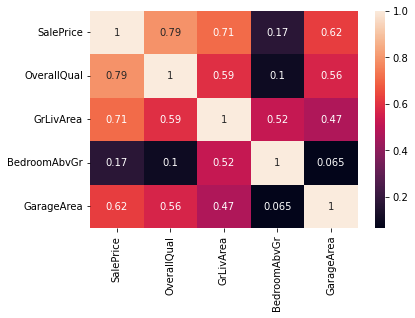

In [6]:
import seaborn as sns
_ = sns.heatmap(choose_features.corr(), annot=True)

In [7]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_train['SaleCondition'] = ordinal_encoder.fit_transform(X_train[['SaleCondition']])
X_train.head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition
339,6,1215,3,297,IR1,4.0
669,4,1180,2,252,Reg,4.0
1459,5,1256,3,276,Reg,4.0
178,9,2234,1,1166,IR1,5.0
1244,8,1517,3,400,IR1,4.0
121,4,1123,3,264,Reg,4.0


In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', dtype=int, sparse=False)
encoder.fit(X_train['LotShape'].values.reshape(-1,1))

OneHotEncoder(dtype=<class 'int'>, sparse=False)

In [9]:
encoder.categories_

[array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object)]

In [10]:
encoded_lotShape = encoder.fit_transform(X_train['LotShape'].values.reshape(-1,1))
encoded_lotShape

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [11]:
encoded_lotShape_columns = encoder.get_feature_names(X_train[['LotShape']].columns)
encoded_lotShape_columns

/Users/yeqinghua/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg'],
      dtype=object)

In [12]:
encoded_lotShape_df = pd.DataFrame(data=encoded_lotShape, columns=encoded_lotShape_columns, index=X_train[['LotShape']].index)
encoded_lotShape_df.head(5)

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
339,1,0,0,0
669,0,0,0,1
1459,0,0,0,1
178,1,0,0,0
1244,1,0,0,0


In [13]:
X_train = X_train.copy().join(encoded_lotShape_df)
X_train.head(5)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
339,6,1215,3,297,IR1,4.0,1,0,0,0
669,4,1180,2,252,Reg,4.0,0,0,0,1
1459,5,1256,3,276,Reg,4.0,0,0,0,1
178,9,2234,1,1166,IR1,5.0,1,0,0,0
1244,8,1517,3,400,IR1,4.0,1,0,0,0


In [14]:
X_train= X_train.drop('LotShape', axis=1)
X_train.head(5)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
339,6,1215,3,297,4.0,1,0,0,0
669,4,1180,2,252,4.0,0,0,0,1
1459,5,1256,3,276,4.0,0,0,0,1
178,9,2234,1,1166,5.0,1,0,0,0
1244,8,1517,3,400,4.0,1,0,0,0


In [15]:
features_to_scale = [ 'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea']
X_train[features_to_scale].head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea
339,6,1215,3,297
669,4,1180,2,252
1459,5,1256,3,276
178,9,2234,1,1166
1244,8,1517,3,400
121,4,1123,3,264


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train.loc[:,features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_train.head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
339,-0.074631,-0.577432,0.173815,-0.791082,4.0,1,0,0,0
669,-1.560470,-0.647032,-1.034614,-1.000442,4.0,0,0,0,1
1459,-0.817551,-0.495901,0.173815,-0.888783,4.0,0,0,0,1
178,2.154127,1.448912,-2.243042,3.251876,5.0,1,0,0,0
1244,1.411208,0.023114,0.173815,-0.311882,4.0,1,0,0,0
121,-1.560470,-0.760380,0.173815,-0.944612,4.0,0,0,0,1


In [17]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model

SVC(kernel='linear')

In [18]:
model.fit(X_train, y_train)

SVC(kernel='linear')

### Model evaluation

In [19]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_test['SaleCondition'] = ordinal_encoder.fit_transform(X_test[['SaleCondition']])
X_test.head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition
1199,4,1382,3,459,Reg,4.0
1232,4,1224,2,462,Reg,4.0
1114,5,833,2,326,Reg,4.0
435,7,1661,3,550,IR2,4.0
920,6,1721,3,471,IR1,4.0
1203,7,1630,3,451,Reg,4.0


In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', dtype=int, sparse=False)
encoder.fit(X_test['LotShape'].values.reshape(-1,1))

OneHotEncoder(dtype=<class 'int'>, sparse=False)

In [21]:
encoded_lotShape_test = encoder.fit_transform(X_test['LotShape'].values.reshape(-1,1))
encoded_lotShape_test

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

In [22]:
encoded_lotShape_columns_test = encoder.get_feature_names(X_test[['LotShape']].columns)
encoded_lotShape_columns_test

/Users/yeqinghua/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg'],
      dtype=object)

In [23]:
encoded_lotShape_df_test = pd.DataFrame(data=encoded_lotShape_test, columns=encoded_lotShape_columns_test, index=X_test[['LotShape']].index)
encoded_lotShape_df_test.head(5)

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
1199,0,0,0,1
1232,0,0,0,1
1114,0,0,0,1
435,0,1,0,0
920,1,0,0,0


In [24]:
X_test = X_test.copy().join(encoded_lotShape_df_test)
X_test.head(5)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
1199,4,1382,3,459,Reg,4.0,0,0,0,1
1232,4,1224,2,462,Reg,4.0,0,0,0,1
1114,5,833,2,326,Reg,4.0,0,0,0,1
435,7,1661,3,550,IR2,4.0,0,1,0,0
920,6,1721,3,471,IR1,4.0,1,0,0,0


In [25]:
X_test= X_test.drop('LotShape', axis=1)
X_test.head(5)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
1199,4,1382,3,459,4.0,0,0,0,1
1232,4,1224,2,462,4.0,0,0,0,1
1114,5,833,2,326,4.0,0,0,0,1
435,7,1661,3,550,4.0,0,1,0,0
920,6,1721,3,471,4.0,1,0,0,0


In [26]:
features_to_scale_test = [ 'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea']
X_test[features_to_scale_test].head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea
1199,4,1382,3,459
1232,4,1224,2,462
1114,5,833,2,326
435,7,1661,3,550
920,6,1721,3,471
1203,7,1630,3,451


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_test.loc[:,features_to_scale_test] = scaler.fit_transform(X_test[features_to_scale_test])
X_test.head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
1199,-1.501450,-0.257755,0.159405,-0.077535,4.0,0,0,0,1
1232,-1.501450,-0.553323,-1.074779,-0.063461,4.0,0,0,0,1
1114,-0.786074,-1.284759,-1.074779,-0.701479,4.0,0,0,0,1
435,0.644678,0.264165,0.159405,0.349374,4.0,0,1,0,0
920,-0.070698,0.376406,0.159405,-0.021239,4.0,1,0,0,0
1203,0.644678,0.206174,0.159405,-0.115066,4.0,0,0,0,1


In [28]:
model.fit(X_test, y_test)

SVC(kernel='linear')

In [29]:
y_pred = model.predict(X_test)
y_pred

array([115000, 140000, 115000, ..., 127500, 127000, 140000])

In [30]:
from sklearn.metrics import mean_squared_log_error

def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)
compute_rmsle(y_test, y_pred)

0.19

## Model inference

In [31]:
df = pd.read_csv('/Users/yeqinghua/Documents/dsp-dataset/house price/test.csv')
df.sample(n=6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
470,1931,85,RL,70.0,7669,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal
111,1572,20,RL,75.0,9525,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1380,2841,60,RL,68.0,9272,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1359,2820,20,RL,75.0,9375,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1247,2708,20,RL,NaN,13052,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,1,2006,WD,Normal
237,1698,60,RL,106.0,12720,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal


In [32]:
inference_data = df[['OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'LotShape', 'SaleCondition']]
inference_data.head(5)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition
0,5,896,2,730.0,Reg,Normal
1,6,1329,3,312.0,IR1,Normal
2,5,1629,3,482.0,IR1,Normal
3,6,1604,3,470.0,IR1,Normal
4,8,1280,2,506.0,IR1,Normal


In [33]:
inference_data.isnull().sum()

OverallQual      0
GrLivArea        0
BedroomAbvGr     0
GarageArea       1
LotShape         0
SaleCondition    0
dtype: int64

In [34]:
inference_data = inference_data.dropna(axis=0, how='any')

In [35]:
inference_data.isnull().sum()

OverallQual      0
GrLivArea        0
BedroomAbvGr     0
GarageArea       0
LotShape         0
SaleCondition    0
dtype: int64

In [36]:
inference_data_to_encode = inference_data[['OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'LotShape', 'SaleCondition']]
inference_data_to_scale = inference_data[['OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'LotShape', 'SaleCondition']]

In [37]:
from sklearn.preprocessing import OrdinalEncoder

inference_data['SaleCondition'] = ordinal_encoder.transform(inference_data[['SaleCondition']])
inference_data.head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition
0,5,896,2,730.0,Reg,4.0
1,6,1329,3,312.0,IR1,4.0
2,5,1629,3,482.0,IR1,4.0
3,6,1604,3,470.0,IR1,4.0
4,8,1280,2,506.0,IR1,4.0
5,6,1655,3,440.0,IR1,4.0


In [38]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(handle_unknown='error', dtype=int, sparse=False)
one_hot_encoder.fit(inference_data['LotShape'].values.reshape(-1,1))

OneHotEncoder(dtype=<class 'int'>, sparse=False)

In [39]:
encoded_lotShape_inference = encoder.transform(inference_data['LotShape'].values.reshape(-1,1))
encoded_lotShape_inference

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [40]:
encoded_lotShape_columns_inference = encoder.get_feature_names_out(inference_data[['LotShape']].columns)
encoded_lotShape_columns_inference

array(['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg'],
      dtype=object)

In [41]:
encoded_lotShape_df_inference = pd.DataFrame(data=encoded_lotShape_inference, columns=encoded_lotShape_columns_inference, index=inference_data[['LotShape']].index)
encoded_lotShape_df_inference.head(5)

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [42]:
inference_data = inference_data.copy().join(encoded_lotShape_df_inference)
inference_data.head(5)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,5,896,2,730.0,Reg,4.0,0,0,0,1
1,6,1329,3,312.0,IR1,4.0,1,0,0,0
2,5,1629,3,482.0,IR1,4.0,1,0,0,0
3,6,1604,3,470.0,IR1,4.0,1,0,0,0
4,8,1280,2,506.0,IR1,4.0,1,0,0,0


In [43]:
inference_data= inference_data.drop('LotShape', axis=1)
inference_data.head(5)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,5,896,2,730.0,4.0,0,0,0,1
1,6,1329,3,312.0,4.0,1,0,0,0
2,5,1629,3,482.0,4.0,1,0,0,0
3,6,1604,3,470.0,4.0,1,0,0,0
4,8,1280,2,506.0,4.0,1,0,0,0


In [44]:
features_to_scale_inference = [ 'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea']
inference_data[features_to_scale_inference].head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea
0,5,896,2,730.0
1,6,1329,3,312.0
2,5,1629,3,482.0
3,6,1604,3,470.0
4,8,1280,2,506.0
5,6,1655,3,440.0


In [45]:
from sklearn.preprocessing import StandardScaler

inference_data.loc[:,features_to_scale_inference] = scaler.transform(inference_data[features_to_scale_inference])
inference_data.head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,-0.786074,-1.166906,-1.074779,1.193809,4.0,0,0,0,1
1,-0.070698,-0.356901,0.159405,-0.767157,4.0,1,0,0,0
2,-0.786074,0.204303,0.159405,0.030365,4.0,1,0,0,0
3,-0.070698,0.157536,0.159405,-0.025931,4.0,1,0,0,0
4,1.360054,-0.448564,-1.074779,0.142956,4.0,1,0,0,0
5,-0.070698,0.252941,0.159405,-0.166670,4.0,1,0,0,0


In [46]:
y_pred_inference = model.predict(inference_data)
y_pred_inference

array([120500, 165000, 175000, ..., 125000,  79000, 197000])

## object persistance

### Persist the trained model

In [47]:
import joblib
#svc model
joblib.dump(model, '/Users/yeqinghua/Github/dsp-Qinghua-YE/models/model.joblib', compress=0, protocol=None, cache_size=None)
svc_model = joblib.load('/Users/yeqinghua/Github/dsp-Qinghua-YE/models/model.joblib', mmap_mode=None)
svc_model

SVC(kernel='linear')

### Persist the encoders and scalers

In [48]:
#ordinalEncoder
joblib.dump(ordinal_encoder, '/Users/yeqinghua/Github/dsp-Qinghua-YE/models/ordinal_encoder.joblib', compress=0, protocol=None, cache_size=None)
ordinalEncoder = joblib.load('/Users/yeqinghua/Github/dsp-Qinghua-YE/models/ordinal_encoder.joblib', mmap_mode=None)
ordinalEncoder

OrdinalEncoder()

In [49]:
#oneHotEncoder
joblib.dump(one_hot_encoder, '/Users/yeqinghua/Github/dsp-Qinghua-YE/models/one_hot_encoder.joblib', compress=0, protocol=None, cache_size=None)
oneHotEncoder = joblib.load('/Users/yeqinghua/Github/dsp-Qinghua-YE/models/one_hot_encoder.joblib', mmap_mode=None)
oneHotEncoder

OneHotEncoder(dtype=<class 'int'>, sparse=False)

In [50]:
#scalar
joblib.dump(scaler, '/Users/yeqinghua/Github/dsp-Qinghua-YE/models/scaler.joblib', compress=0, protocol=None, cache_size=None)
standardScaler = joblib.load('/Users/yeqinghua/Github/dsp-Qinghua-YE/models/scaler.joblib', mmap_mode=None)
standardScaler

StandardScaler()

## code refactoring

In [51]:
def read_dataset(file_path):
    dataset = pd.read_csv(file_path)
    df=dataset.copy()
    return df

In [52]:
df = read_dataset("/Users/yeqinghua/Downloads/train.csv")

In [53]:
def select_features(df):
    X = df[['SalePrice', 'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'LotShape', 'SaleCondition']]
    X = X.dropna().reset_index(drop=True)
    y = df['SalePrice'].values.reshape(-1,1)
    X = X.drop('SalePrice', axis=1)
    return X,y

### Model training

In [54]:
def get_train_test_sets(X_feature,y_feature,size,random):
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y_feature, test_size = size, random_state = random)
    return X_train,X_test, y_train, y_test

In [55]:
ordinal_encoder = OrdinalEncoder()
def ordinal_encode_data(df,ord_encode_column):
    df[ord_encode_column] = ordinalEncoder.fit_transform(df[[ord_encode_column]])
    return df

In [56]:
encoder = OneHotEncoder(handle_unknown = 'error', dtype=int, sparse=False)
def one_hot_encode_data(df,one_hot_encode_column):
    encoded_columns = oneHotEncoder.fit_transform(df[one_hot_encode_column].values.reshape(-1, 1))
    encoded_columns_names = oneHotEncoder.get_feature_names_out(df[[one_hot_encode_column]].columns)
    encoded_df = pd.DataFrame(data=encoded_columns, columns=encoded_columns_names, index=df[[one_hot_encode_column]].index)
    df = df.copy().join(encoded_df)
    df= df.drop(one_hot_encode_column, axis=1)
    return df

In [57]:
scaler = StandardScaler()
def scale_data(df, scale_column1, scale_column2, scale_column3, scale_column4):
    df[[scale_column1, scale_column2, scale_column3, scale_column4]] = standardScaler.fit_transform(df[[scale_column1, scale_column2, scale_column3, scale_column4]])
    return df

In [58]:
def train_model(X, y):
    Model= model.fit(X, y)
    return Model

### Model evaluation

In [59]:
def ordinal_encode_data_transform(df,ord_encode_column):
    df[ord_encode_column] = ordinalEncoder.transform(df[[ord_encode_column]])
    return df

In [60]:
def one_hot_encode_data_transform(df,one_hot_encode_column):
    encoded_columns = oneHotEncoder.transform(df[one_hot_encode_column].values.reshape(-1, 1))
    encoded_columns_names = oneHotEncoder.get_feature_names_out(df[[one_hot_encode_column]].columns)
    encoded_df = pd.DataFrame(data=encoded_columns, columns=encoded_columns_names, index=df[[one_hot_encode_column]].index)
    df = df.copy().join(encoded_df)
    df= df.drop(one_hot_encode_column, axis=1)
    return df

In [61]:
def scale_data_transform(df, scale_column1, scale_column2, scale_column3, scale_column4):
    df[[scale_column1, scale_column2, scale_column3, scale_column4]] = standardScaler.transform(df[[scale_column1, scale_column2, scale_column3, scale_column4]])
    return df

In [62]:
def prediction(predict_data):
    y_pred = svc_model.predict(predict_data)
    return y_pred

In [63]:
def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

In [81]:
def evaluate_model(df) -> dict[str, str]:
    X,y = select_features(df)
    X_train,X_test, y_train, y_test = get_train_test_sets(X,y,0.25,0)
    X_train = ordinal_encode_data(X_train,'SaleCondition')
    X_train = one_hot_encode_data(X_train,'LotShape')
    X_train = scale_data(X_train,'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea')
    Model = train_model(X_train,y_train)
    X_test = ordinal_encode_data_transform(X_test,'SaleCondition')
    X_test = one_hot_encode_data_transform(X_test,'LotShape')
    X_test = scale_data_transform(X_test,'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea')
    y_pred = prediction(X_test)
    compute_rmsle(y_test, y_pred)
    return {'rsme': compute_rmsle(y_test, y_pred)}

In [82]:
evaluate_model(df)

/Users/yeqinghua/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'rsme': 0.2}

### Model inference

In [73]:
data = read_dataset("/Users/yeqinghua/Downloads/test.csv")

In [74]:
def choose_features(data):
    X = df[['OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'LotShape', 'SaleCondition']]
    X = X.dropna().reset_index(drop=True)
    return X

In [83]:
def model_inference(data) -> np.ndarray:
    X = choose_features(data)
    X = ordinal_encode_data_transform(X,'SaleCondition')
    X = one_hot_encode_data_transform(X,'LotShape')
    X = scale_data_transform(X,'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea')
    y_pred_infer = prediction(X)
    return y_pred_infer

In [84]:
model_inference(data)

array([210000, 155000, 230000, ..., 266500, 140000, 139000])